In [24]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import sklearn.metrics as metrics

In [25]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

In [26]:
# import and view first 10 items of file
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Carseats.csv"
CarSeats = pd.read_csv(url)
print(CarSeats.head())
print(list(CarSeats))
print(CarSeats.info())

   SlNo  Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  \
0     1   9.50        138      73           11         276    120       Bad   
1     2  11.22        111      48           16         260     83      Good   
2     3  10.06        113      35           10         269     80    Medium   
3     4   7.40        117     100            4         466     97    Medium   
4     5   4.15        141      64            3         340    128       Bad   

   Age  Education Urban   US  
0   42         17   Yes  Yes  
1   65         10   Yes  Yes  
2   59         12   Yes  Yes  
3   55         14   Yes  Yes  
4   38         13   Yes   No  
['SlNo', 'Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
SlNo           400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Inc

In [27]:
# 10.a. Multiple regression
reg_1 = ols(formula = 'Sales ~ Price + C(Urban) + C(US)', data = CarSeats).fit() # C prepares categorical data for regression
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.66e-24
Time:                        17:57:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

In [28]:
# 10.e. Regression with better fit and lesser predictors
reg_2 = ols(formula = 'Sales ~ Price + C(US)', data = CarSeats).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.66e-24
Time:                        17:57:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

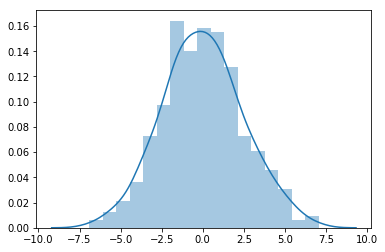

In [29]:
# run predictions

predictions_1 = pd.DataFrame(reg_1.predict())
residuals_1 = CarSeats['Sales'] - predictions_1[0]
plt.figure()
sns.distplot(residuals_1) # residuals are normally distributed. Love it!!!

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.66e-24
Time:                        17:57:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

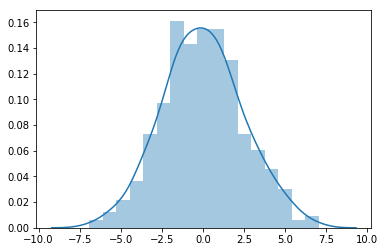

In [30]:
reg_2 = ols(formula = 'Sales ~ Price + C(US)', data = CarSeats).fit()
print(reg_2.summary())
predictions_2 = pd.DataFrame(reg_2.predict())
residuals_2 = CarSeats['Sales'] - predictions_2[0]
plt.figure()
sns.distplot(residuals_2) # residuals are normally distributed. Love it!!!

In [31]:
# error calculations
Y = CarSeats['Sales']
Yhat_1 = predictions_1[0]
Yhat_2 = predictions_2[0]

In [32]:
MAE_1 = metrics.mean_absolute_error(Y, Yhat_1)
MSE_1 = metrics.mean_squared_error(Y, Yhat_1)
RMSE_1 = np.sqrt(MSE_1)

In [33]:
print("Model#1 Mean Absolute Error: %f" % MAE_1)
print("Model#1 Mean Squared Error : %f" % MSE_1)
print("Model#1 Root Mean Squared Error: %f" % RMSE_1)

Model#1 Mean Absolute Error: 1.958839
Model#1 Mean Squared Error : 6.052087
Model#1 Root Mean Squared Error: 2.460099


In [34]:
MAE_2 = metrics.mean_absolute_error(Y, Yhat_2)
MSE_2 = metrics.mean_squared_error(Y, Yhat_2)
RMSE_2 = np.sqrt(MSE_2)
print()

In [35]:
print("Model#1 Mean Absolute Error: %f" % MAE_2)
print("Model#1 Mean Squared Error : %f" % MSE_2)
print("Model#1 Root Mean Squared Error: %f" % RMSE_2)

Model#1 Mean Absolute Error: 1.959480
Model#1 Mean Squared Error : 6.052186
Model#1 Root Mean Squared Error: 2.460119


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Residuals vs Fitted - Residuals_2')

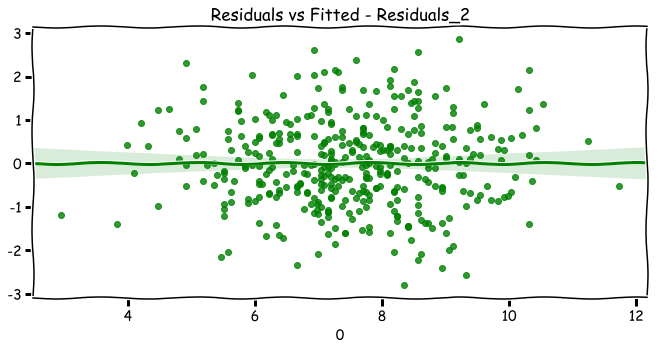

In [36]:
# residuals vs fitted plot
plt.xkcd()
plt.figure(figsize = (11, 5))
sns.regplot(Yhat_2, reg_2.resid_pearson, fit_reg = True, color = 'g')
plt.title("Residuals vs Fitted - Residuals_2")

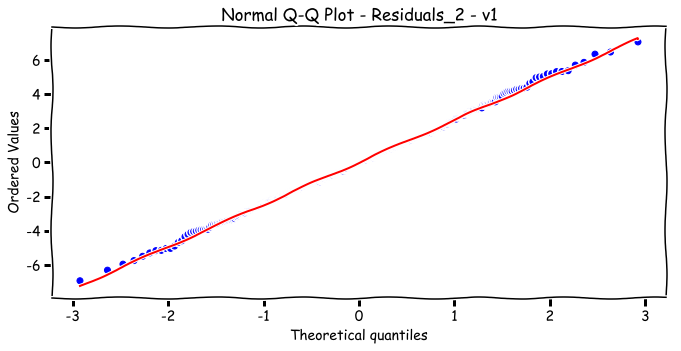

In [37]:
# normal q-q plot
plt.xkcd()
plt.figure(figsize = (11, 5))
stats.probplot(residuals_2, plot = plt)
plt.title("Normal Q-Q Plot - Residuals_2 - v1")
plt.show()

<Figure size 792x360 with 0 Axes>

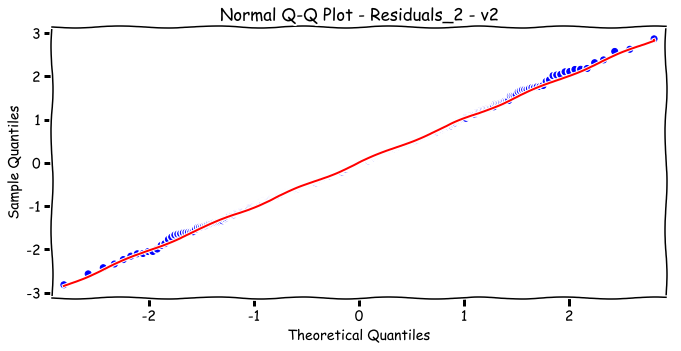

In [38]:
plt.xkcd()
plt.figure(figsize = (11, 5))
sm.qqplot(reg_2.resid_pearson, fit = True, line = 'r') # another way to do it
plt.title("Normal Q-Q Plot - Residuals_2 - v2")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in sqrt



Text(0.5,1,'Scale-Location Plot - Residuals_2')

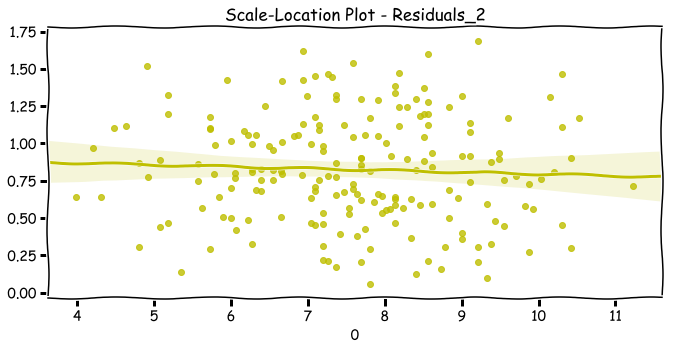

In [40]:
# scale-location plot
plt.xkcd()
plt.figure(figsize = (11, 5))
sns.regplot(Yhat_2, np.sqrt(reg_2.resid_pearson), fit_reg = True, color = 'y')
plt.title("Scale-Location Plot - Residuals_2")

<Figure size 2160x360 with 0 Axes>

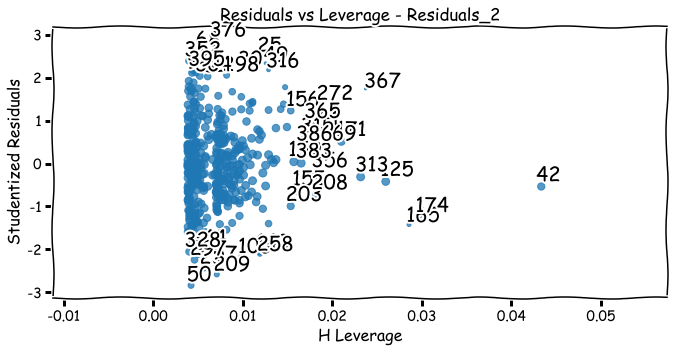

In [41]:
# residuals vs leverage plot
plt.xkcd()
fig = plt.figure(figsize = (11, 5))
fig.set_size_inches(30, fig.get_figheight(), forward=True)
sm.graphics.influence_plot(reg_2, criterion="cooks", size = 0.0002**2)
plt.title("Residuals vs Leverage - Residuals_2")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.show()

# 10.h. Yes, there are high leverage points. Point 42 is one such example.